In [ ]:
!pip install opencv-python
!pip install opencv-python-headless

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-07-15 15:20:08--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.3’

yolov3.weights.3    100%[===================>] 236.52M  11.0MB/s    in 10s     

2024-07-15 15:20:19 (23.1 MB/s) - ‘yolov3.weights.3’ saved [248007048/248007048]

--2024-07-15 15:20:19--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.3’

yolov3.cfg.3        100%[===================>]   8.15K  --.-KB/s    in 0s   

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
net=cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
with open("coco.names","r") as f:#opening the dataset
    classes=[line.strip()for line in f.readlines()]#reading the dataset

In [ ]:
def detect_objects(img,net,output_layers):#does the following:-1)process the frame(resize,normalize)2)running frame thru yolov3 model 3)post process results(apply non maximum suppression)
  height,width,channels=img.shape
  blob=cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)#function scale,4-D array
  net.setInput(blob)#setting blob parameter as input in neural network
  outs=net.forward(output_layers)#forward pass through yolo network to get output from output layers
  class_ids=[]
  confidences=[]
  boxes=[]
  for out in outs:
    for detection in out:
      scores=detection[5:]
      class_id=np.argmax(scores)#detecting maximum score
      confidence=scores[class_id]
      if confidence>0.5:#if confidence is lesser than 0.5,then accuracy is low
        center_x=int(detection[0]*width)#center coordinates
        center_y=int(detection[1]*height)
        w=int(detection[2]*width)#other coordinates
        h=int(detection[3]*height)
        x=int(center_x-w/2)
        y=int(center_y-h/2)
        boxes.append([x,y,w,h])
        confidences.append(float(confidence))
        class_ids.append(class_id)
  indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)#this line is for non maximum supression to remove redundant overlapping bounding boxes with lower confidence scores
  #the function cv2.dnn.NMSBoxes takes bounding boxes and confidence score a thresold for confidence score 0.5 and a thresold NMS 0.4
  return class_ids,confidences,boxes,indexes

In [ ]:
layer_names=net.getLayerNames()#collecting names of all layers in yolov3 network,net object represents the loaded yolov3 model
output_layers=[layer_names[i-1] for i in net.getUnconnectedOutLayers()]#getting names of output layers where detection results are stored
#print(output_layers)
cap =cv2.VideoCapture(0)
while True:
  ret,frame=cap.read()#ret is boolean indicator,if frame is succesfully read;frame is capture image frame
  if not ret:
    break
  class_ids,confidences,boxes,indexes=detect_objects(frame,net,output_layers)#performing object detection on current frame
  #process and dispay detect object
  for i in range(len(boxes)):#looping thru each detect bounding box
    if i in indexes:#check if bounding box is valid
      x,y,w,h=boxes[i]#extracting bounding boxes coordinates
      label=str(classes[class_ids[i]])#getting object class label from classes list
      confidence=confidences[i]
      color=(0,255,0)
      cv2.rectangle(frame,(x,y),(x+w,y+h),color,2)#for object creation by box identification
      cv2.putText(frame,f"{label} {confidence:.2f}",(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)#adding label,checking confidence score
  cv2_imshow(frame)
  key= cv2.waitKey(1)#key=response time(1 millisec here)helps in real time interaction
  if key==27:
    break
cap.release()
cv2.destroyAllWindows()

Saving images.jpg to images (8).jpg


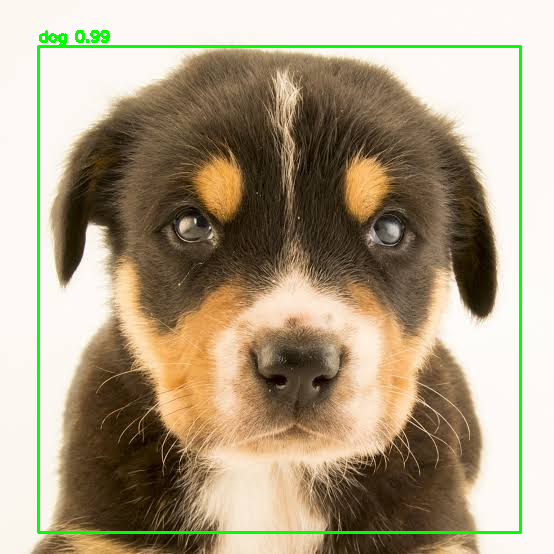

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  img=cv2.imread(fn)
  class_ids,confidences,boxes,indexes=detect_objects(img,net,output_layers)
  for i in range(len(boxes)):#looping thru each detect bounding box
    if i in indexes:#check if bounding box is valid
      x,y,w,h=boxes[i]#extracting bounding boxes coordinates
      label=str(classes[class_ids[i]])#getting object class label from classes list
      confidence=confidences[i]
      color=(0,255,0)
      cv2.rectangle(img,(x,y),(x+w,y+h),color,2)#for object creation by box identification
      cv2.putText(img,f"{label} {confidence:.2f}",(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)#adding label,checking confidence score
cv2_imshow(img)
cv2.waitKey(0)
#cap.release()
cv2.destroyAllWindows()


Saving images.jpg to images (9).jpg


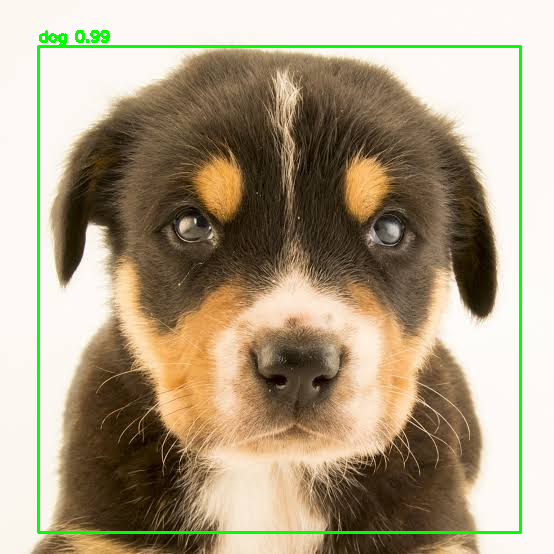

identified objects:
OBJECT:dog,Confidence:0.99


In [ ]:
from google.colab import files

uploaded=files.upload()

for fn in uploaded.keys():
  img=cv2.imread(fn)
  layer_names=net.getLayerNames()
  output_layers=[layer_names[i-1] for i in net.getUnconnectedOutLayers()]
  class_ids,confidences,boxes,indexes=detect_objects(img,net,output_layers)

  detected_objects=[]
  for i in range(len(boxes)):#looping thru each detect bounding box
    if i in indexes:#check if bounding box is valid
      x,y,w,h=boxes[i]#extracting bounding boxes coordinates
      label=str(classes[class_ids[i]])#getting object class label from classes list
      confidence=confidences[i]
      color=(0,255,0)
      cv2.rectangle(img,(x,y),(x+w,y+h),color,2)#for object creation by box identification
      cv2.putText(img,f"{label} {confidence:.2f}",(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)#adding label,checking confidence score
      detected_objects.append((label,confidence))
cv2_imshow(img)
cv2.waitKey(0)
#cap.release()
cv2.destroyAllWindows()
print("identified objects:")
for obg in detected_objects:
  print(f"OBJECT:{obg[0]},Confidence:{obg[1]:.2f}")